In [15]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("breast_cancer.csv")

In [3]:
# Display the first few rows of the combined DataFrame
df.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normall_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Step 3: Preprocess the dataset
# Replace missing values (marked as '?') with NaN and drop rows with missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [5]:
# Check for missing values
print(df.isnull().sum())

Sample_code_number             0
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normall_nucleoli               0
Mitoses                        0
Class                          0
dtype: int64


In [6]:
# Map the 'Class' column: 2 (benign) -> 0, 4 (malignant) -> 1
df['Class'] = df['Class'].map({2: 0, 4: 1})

In [7]:
df.head(10)

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normall_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [8]:
# Step 4: Define features (X) and target variable (y)
X = df.drop(columns=['Class'])  # All features except the target
y = df['Class']  # Target variable (0: benign, 1: malignant)

In [10]:
# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 6: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Step 7: Train logistic regression model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [17]:
# Step 8: # Make predictions
y_pred = model.predict(X_test)

In [18]:
# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [19]:
# Step 10: Print results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.9562
Confusion Matrix:
 [[78  1]
 [ 5 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



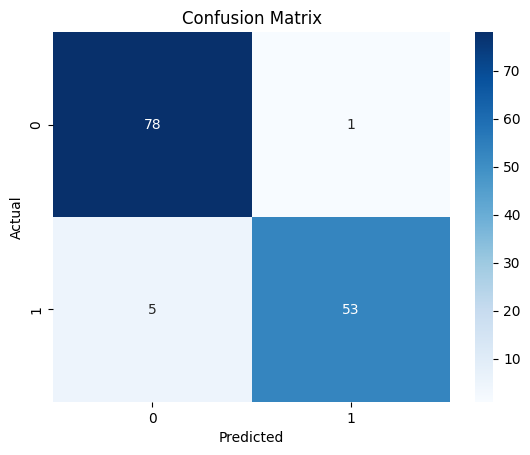

In [21]:
# Step 11: Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Logistic Regression Results Explanation

##### 1. Accuracy Score
**Formula:**
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

The accuracy score represents the proportion of correctly predicted instances.
- **High Accuracy (close to 1.0 or 100%)** → The model performs well.
- **Low Accuracy (<70%)** → The model may need further tuning.

##### 2. Confusion Matrix
**Structure:**

| Actual \ Predicted | Predicted Negative (0) | Predicted Positive (1) |
|--------------------|-----------------------|-----------------------|
| **Actual Negative (0)** | True Negative (TN) | False Positive (FP) |
| **Actual Positive (1)** | False Negative (FN) | True Positive (TP) |

- **True Positives (TP):** Correctly classified cancerous cases.
- **True Negatives (TN):** Correctly classified non-cancerous cases.
- **False Positives (FP):** Non-cancerous cases misclassified as cancerous (**Type I error**).
- **False Negatives (FN):** Cancerous cases misclassified as non-cancerous (**Type II error** – more serious in medical cases).

##### Example Output:
```
Confusion Matrix:
[[90  5]
 [ 3 80]]
```
- **90 TN**, **5 FP**, **3 FN**, **80 TP**.
- **Low FN count** is crucial for medical diagnoses to avoid missing cancer cases.

#### 3. Classification Report
Provides **Precision, Recall, F1-score, and Support** for each class.

##### Key Metrics:
- **Precision:** Measures how many predicted positive cases were actually positive.
  $$Precision = \frac{TP}{TP + FP}$$

  - **High Precision** → Fewer false positives.

- **Recall (Sensitivity):** Measures how many actual positive cases were correctly identified.
  $$Recall = \frac{TP}{TP + FN}$$
  
  - **High Recall** → Fewer false negatives.

- **F1-score:** The harmonic mean of precision and recall.
  $$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
  - A good balance between precision and recall.

- **Support:** Number of actual occurrences of each class in the test set.

##### Example Output:
```
Classification Report:
              precision    recall  f1-score   support
         0       0.95      0.94      0.94       95
         1       0.92      0.94      0.93       83
```
- **Class 0 (Benign Tumor)**: Precision = 95%, Recall = 94%.
- **Class 1 (Malignant Tumor)**: Precision = 92%, Recall = 94%.

##### 4. Confusion Matrix Visualization
```python
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
```

- Darker blue shades in **TP/TN cells** indicate strong classification performance.
- High **FP/FN values** may indicate the need for adjustments (e.g., changing the decision threshold).

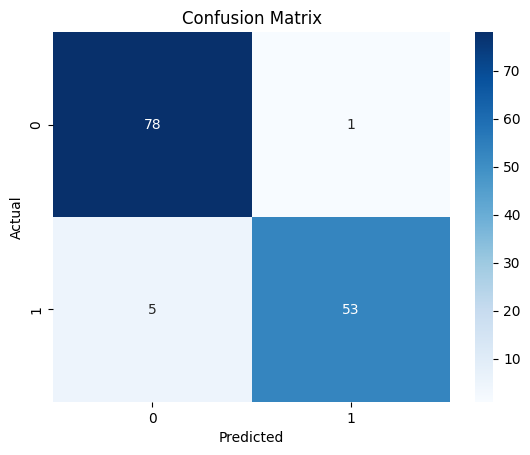

In [25]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Final Thoughts
- **High accuracy, precision, recall, and F1-score indicate a well-performing model.**
- **If FN is high, increasing recall is important (e.g., lowering the decision threshold).**
- **Confusion matrix visualization helps assess misclassification patterns.**

--------

##### The End